## Initialize Fashion MNIST Datasets

In [ ]:
!pip install kneed

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [ ]:
#Import dataset files
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
#Load datasets
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
#View first 10 rows of train data
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [ ]:
#View first 10 rows of test data
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


## Summary Statistics, Data Processing, and Unsupervised Learning

### Frequency Table

#### Frequency Table for $Y_{train}$

In [ ]:
train_freq=pd.crosstab(train['label'], 'frequency')

train_freq

col_0,frequency
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


#### Frequency Table for $Y_{test}$

In [ ]:
test_freq=pd.crosstab(index=test['label'], columns='frequency')

test_freq

col_0,frequency
label,
0,1000
1,1000
2,1000
3,1000
4,1000
5,1000
6,1000
7,1000
8,1000


###Min, Max, Median, and Mode of each X column in the training data

In [ ]:
X = train.iloc[:, 1:]

max = pd.DataFrame(X.max(0))
min = pd.DataFrame(X.min(0))
median = X.median(0).transpose()
mode = X.mode(0).transpose()


descriptive = pd.concat([max, min, median, mode], axis=1, ignore_index=True)
descriptive.rename({0: 'Max', 1: 'Min', 2: 'Median', 3: 'Mode'}, axis=1, inplace = True)
descriptive

,Max,Min,Median,Mode
pixel1,16,0,0.0,0
pixel2,36,0,0.0,0
pixel3,226,0,0.0,0
pixel4,164,0,0.0,0
pixel5,227,0,0.0,0
...,...,...,...,...
pixel780,255,0,0.0,0
pixel781,255,0,0.0,0
pixel782,255,0,0.0,0
pixel783,255,0,0.0,0


In [ ]:
X_test = test.iloc[:, 1:]

max2 = pd.DataFrame(X_test.max(0))
min2 = pd.DataFrame(X_test.min(0))
median2 = X_test.median(0).transpose()
mode2 = X_test.mode(0).transpose()

descriptive2 = pd.concat([max2, min2, median2, mode2], axis=1, ignore_index=True)
descriptive2.rename({0: 'Max', 1: 'Min', 2: 'Median', 3: 'Mode'}, axis=1, inplace = True)
descriptive2

,Max,Min,Median,Mode
pixel1,2,0,0.0,0
pixel2,45,0,0.0,0
pixel3,218,0,0.0,0
pixel4,185,0,0.0,0
pixel5,227,0,0.0,0
...,...,...,...,...
pixel780,255,0,0.0,0
pixel781,240,0,0.0,0
pixel782,225,0,0.0,0
pixel783,205,0,0.0,0


## Standardize Data

In [ ]:
train_scale =train.iloc[:,1:]/255
train_scale.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
test_scale =test.iloc[:,1:]/255
test_scale.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
max3 = pd.DataFrame(train_scale.max(0))
min3 = pd.DataFrame(train_scale.min(0))
median3 = train_scale.median(0).transpose()
mode3 = train_scale.mode(0).transpose()

descriptive3 = pd.concat([max3, min3, median3, mode3], axis=1, ignore_index=True)
descriptive3.rename({0: 'Max', 1: 'Min', 2: 'Median', 3: 'Mode'}, axis=1, inplace = True)
descriptive3

,Max,Min,Median,Mode
pixel1,0.062745,0.0,0.0,0.0
pixel2,0.141176,0.0,0.0,0.0
pixel3,0.886275,0.0,0.0,0.0
pixel4,0.643137,0.0,0.0,0.0
pixel5,0.890196,0.0,0.0,0.0
...,...,...,...,...
pixel780,1.000000,0.0,0.0,0.0
pixel781,1.000000,0.0,0.0,0.0
pixel782,1.000000,0.0,0.0,0.0
pixel783,1.000000,0.0,0.0,0.0


In [ ]:
max4 = pd.DataFrame(test_scale.max(0))
min4 = pd.DataFrame(test_scale.min(0))
median4 = test_scale.median(0).transpose()
mode4 = test_scale.mode(0).transpose()

descriptive4 = pd.concat([max4, min4, median4, mode4], axis=1, ignore_index=True)
descriptive4.rename({0: 'Max', 1: 'Min', 2: 'Median', 3: 'Mode'}, axis=1, inplace = True)
descriptive4

,Max,Min,Median,Mode
pixel1,0.007843,0.0,0.0,0.0
pixel2,0.176471,0.0,0.0,0.0
pixel3,0.854902,0.0,0.0,0.0
pixel4,0.725490,0.0,0.0,0.0
pixel5,0.890196,0.0,0.0,0.0
...,...,...,...,...
pixel780,1.000000,0.0,0.0,0.0
pixel781,0.941176,0.0,0.0,0.0
pixel782,0.882353,0.0,0.0,0.0
pixel783,0.803922,0.0,0.0,0.0


In [ ]:
def min_max(dataset):
  dataset_min_max= dataset.copy()
  for column in dataset_min_max.columns:
    dataset_min_max[column] = (dataset_min_max[column] - dataset_min_max[column].min()) / (dataset_min_max[column].max() - dataset_min_max[column].min())
  return dataset_min_max

train_min_max=min_max(train.iloc[:,1:])
test_min_max=min_max(test.iloc[:,1:])

In [ ]:
test_min_max.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.041284,0.032787,0.000,...,0.405512,0.345238,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.133858,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.05668,0.243119,0.405738,0.068,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.129167,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.644,...,0.539370,0.500000,0.549020,0.0,0.521569,0.878431,0.925000,0.248889,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
train_min_max.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.006098,0.008811,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


### Clustering Algorithm #1: Kmeans Clustering

In [ ]:
#Choose optimal number of clusters for Kmeans clustering
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 542,
    }

#Get SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, **kmeans_args)
  kmeans.fit(train_scale)
  sse.append(kmeans.inertia_)

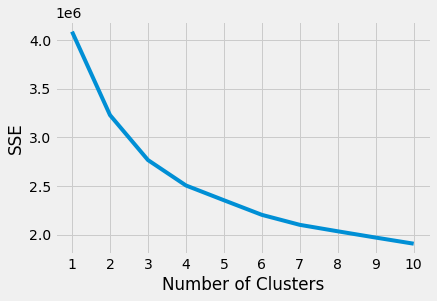

In [ ]:
#Elbow plot
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#Optimal k
kl = KneeLocator(range(1, 11), sse, curve = "convex", direction = "decreasing")
kl.elbow

4

In [ ]:
#Perform Kmeans clustering with optimal k
kmeans = KMeans(
    init = "random",
    n_clusters = kl.elbow,
    n_init = 10,
    max_iter = 300,
    random_state = 542
    )

kmeans.fit(train_scale)

KMeans(init='random', n_clusters=4, random_state=542)

In [ ]:
kmeans.labels_[:]

array([3, 0, 3, ..., 3, 0, 0], dtype=int32)

In [ ]:
kclus_data = pd.DataFrame({'label': np.array(train.iloc[:,0]), 'cluster': kmeans.labels_[:]}, columns = ['label', 'cluster'])
kclus_data

,label,cluster
0,2,3
1,9,0
2,6,3
3,0,1
4,3,1
...,...,...
59995,9,0
59996,1,1
59997,8,3
59998,8,0


In [ ]:
#Get dominating label in each cluster
print(kclus_data.groupby('cluster').agg(lambda x:x.value_counts().index[0]))

         label
cluster       
0            9
1            1
2            5
3            4


Clustering Algorithm #2: Self-organized Map

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=3567e48b35309f668e02d912991322eea536e360b27fa60f3903ec389d9f28e6
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


For the number of neurons, there is no set recommendation. Some suggestions I've found include:
1. 5*sqrt(n obs), which would give about 1225 (seems too many)
2. About 10 neurons per expected class, which would give 100 (10x10 seems like a lot, but more reasonable)
3. Resulting in no more than 5% of clusters to be empty
4. A "big" map would be 4x the default number 4 x 5 x sqrt(n obs) = 4,900 or a "small" map would be 0.25x the default 0.25 x 5 x sqrt(n obs) = 306

Overall no consensus, but 10x10 seems like the smallest recommendation to start.

In [ ]:
from minisom import MiniSom
train_scale = np.array(train_scale)
som = MiniSom(10, 10, 784, sigma=0.5, learning_rate=0.5)
som.random_weights_init(train_scale)
som.train_random(train_scale, 100)

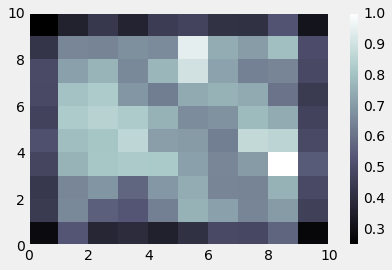

In [ ]:
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone

bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

In [ ]:
t = train["label"]
w = np.zeros(len(t), dtype=int)
clusters = pd.DataFrame(np.array(range(100)).reshape(10,10))

for cnt, xx in enumerate(train_scale):
  w[cnt] = clusters.iloc[som.winner(xx)[0], som.winner(xx)[1]]

In [ ]:
unique, counts = np.unique(np.array(w), return_counts=True)

In [ ]:
np.array((unique, counts)).T

array([[   0,   28],
       [   1,  342],
       [   2,  243],
       [   3,   56],
       [   4,   62],
       [   5,  873],
       [   6,  735],
       [   7,  107],
       [   8,  115],
       [   9,   15],
       [  10,   21],
       [  11,  142],
       [  12, 2000],
       [  13,  269],
       [  14,  116],
       [  15,  162],
       [  16,   12],
       [  17,  160],
       [  18, 1137],
       [  19,  347],
       [  20,  138],
       [  21,   93],
       [  22, 1674],
       [  23, 2512],
       [  24,  289],
       [  25,  123],
       [  26,  116],
       [  27,   77],
       [  28,  558],
       [  29,  369],
       [  30,  848],
       [  31, 1150],
       [  32, 1436],
       [  33,  340],
       [  34,   68],
       [  35,   47],
       [  36,   18],
       [  37,  417],
       [  38, 1675],
       [  39,  362],
       [  40, 1804],
       [  41,  198],
       [  42,  524],
       [  43,   42],
       [  44,  736],
       [  45,  422],
       [  46,  364],
       [  47,

In [ ]:
som_data = pd.DataFrame({'label': np.array(train.iloc[:,0]), 'cluster': w}, columns = ['label', 'cluster'])
som_data

,label,cluster
0,2,42
1,9,37
2,6,96
3,0,76
4,3,12
...,...,...
59995,9,14
59996,1,49
59997,8,79
59998,8,98


In [ ]:
#Get dominating label in each cluster
som_data.groupby('cluster').agg(lambda x:x.value_counts().index[0])

,label
cluster,
0,3
1,4
2,2
3,4
4,6
...,...
95,7
96,4
97,9


## Multi-class Classification Model

### Random Forest

#### Tuning Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [ ]:
Y_train=train['label']
Y_test=test['label']

In [ ]:
tree_number=np.arange(100,450,50)
accuracy=np.zeros(len(tree_number))
i=0

#Find n_estimators-parameter in [100,150,200, ..., 400] that will maximize accuracy
for tree in tree_number:
    clf=RandomForestClassifier(n_estimators=tree, criterion= 'entropy', max_depth=100, random_state = 542)
    clf.fit(train_min_max, Y_train)
    Y_pred_rf=clf.predict(test_min_max)
    accuracy_rf=np.mean(Y_pred_rf==Y_test)
    accuracy[i]=accuracy_rf
    i=i+1

max_index2=np.where(accuracy == np.amax(accuracy))
print('maximizing accuracy number of tree = ', tree_number[max_index2[0][0]])

maximizing accuracy number of tree =  350


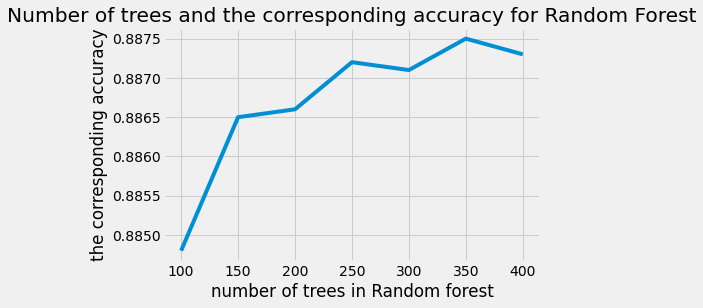

In [ ]:
import matplotlib.pyplot as plt

#Plot the points
plt.plot(tree_number, accuracy)

#Add axes labels
plt.xlabel('number of trees in Random forest')
plt.ylabel('the corresponding accuracy')

#Add title
plt.title('Number of trees and the corresponding accuracy for Random Forest')

plt.show()

#### Final Ranfom Forest Model

In [ ]:
#Create random forest model
clf=RandomForestClassifier(n_estimators=tree_number[max_index2[0][0]], criterion= 'entropy', max_depth=100, random_state = 542)

In [ ]:
#Fit random forest model on training data
clf.fit(train_scale, Y_train)

#Make prediction for testing data
Y_pred_RF=clf.predict(test_scale)

#Calculate accuracy
accuracy_rf=metrics.accuracy_score(Y_test, Y_pred_RF)

#Summarize random forest predictions
print("Accuracy for Random Forest: %.2f%%" % (accuracy_rf * 100.0))
print("Misclassification rate for Random Forest: %.2f%%" % ((1-accuracy_rf) * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy for Random Forest: 88.75%
Misclassification rate for Random Forest: 11.25%


#### Confusion matrix for Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_rf=pd.DataFrame(confusion_matrix(Y_test, Y_pred_RF))
conf_matrix_rf.columns =['predicted class 0', ' predicted class 1', ' predicted class 2', ' predicted class 3', ' predicted class 4', 'predicted class 5',
                         'predicted class 6','predicted class 7', 'predicted class 8', 'predicted class 9']


conf_matrix_rf

,predicted class 0,predicted class 1,predicted class 2,predicted class 3,predicted class 4,predicted class 5,predicted class 6,predicted class 7,predicted class 8,predicted class 9
0,864,0,12,32,2,1,77,0,12,0
1,2,972,5,15,1,1,4,0,0,0
2,6,1,815,12,109,0,47,0,10,0
3,17,7,7,934,20,0,15,0,0,0
4,1,0,54,27,870,0,45,0,3,0
5,0,0,0,0,0,947,0,33,7,13
6,176,1,100,25,74,0,610,0,14,0
7,0,0,0,0,0,16,0,933,0,51
8,1,1,9,0,3,1,5,2,978,0
9,0,0,0,0,0,7,1,37,3,952


### LDA

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#Create LDA model
LDA_model = LDA()

In [ ]:
#Fit LDA model on training data
LDA_model.fit(train_scale, Y_train)

#Make predictions for testing data
Y_pred_lda = LDA_model.predict(test_scale)

#Calculate accuracy
accuracy_lda=np.mean(Y_pred_lda==Y_test)

#Summarize LDA predictions
print('Accuracy for LDA: %.2f%%' % (accuracy_lda * 100.0))
print('Misclassification rate for LDA: %.2f%%' % ((1-accuracy_lda) * 100.0))


Accuracy for LDA: 82.56%
Misclassification rate for LDA: 17.44%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### Confusion matrix for LDA

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_lda=pd.DataFrame(confusion_matrix(Y_test, Y_pred_lda))
conf_matrix_lda.columns =['predicted class 0', ' predicted class 1', ' predicted class 2', ' predicted class 3', ' predicted class 4', 'predicted class 5',
                         'predicted class 6','predicted class 7', 'predicted class 8', 'predicted class 9']


conf_matrix_lda

,predicted class 0,predicted class 1,predicted class 2,predicted class 3,predicted class 4,predicted class 5,predicted class 6,predicted class 7,predicted class 8,predicted class 9
0,768,0,17,71,1,3,123,0,17,0
1,3,940,9,36,0,1,11,0,0,0
2,18,0,715,8,150,2,96,0,11,0
3,21,4,17,871,26,3,58,0,0,0
4,0,1,78,24,788,1,105,0,3,0
5,1,0,1,0,0,890,1,68,12,27
6,145,0,104,40,86,2,605,0,18,0
7,0,0,0,0,0,69,0,855,0,76
8,2,0,5,10,5,22,34,5,916,1
9,0,0,0,0,0,39,0,53,0,908


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Create logistic regression model for multi-class data
model_lr = LogisticRegression(multi_class='multinomial', max_iter=1000, solver = 'sag', random_state = 542)

In [ ]:
#Fit logistic regression model on training data
model_lr.fit(train_scale,Y_train)

#Make predictions for testing data
Y_pred_lr=model_lr.predict(test_scale)

#Calculate accuracy
accuracy_lr=np.mean(Y_pred_lr==Y_test)


#Summarize logistic regression predictions
print('Accuracy for Logistic Regression : %.2f%%' % (accuracy_lr * 100.0))
print('Misclassification rate for Logistic Regression : %.2f%%' % ((1-accuracy_lr) * 100.0))

Accuracy for Logistic Regression : 85.36%
Misclassification rate for Logistic Regression : 14.64%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### Confusion matrix for Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_lr=pd.DataFrame(confusion_matrix(Y_test, Y_pred_lr))
conf_matrix_lr.columns =['predicted class 0', ' predicted class 1', ' predicted class 2', ' predicted class 3', ' predicted class 4', 'predicted class 5',
                         'predicted class 6','predicted class 7', 'predicted class 8', 'predicted class 9']


conf_matrix_lr

,predicted class 0,predicted class 1,predicted class 2,predicted class 3,predicted class 4,predicted class 5,predicted class 6,predicted class 7,predicted class 8,predicted class 9
0,819,3,16,38,1,4,103,0,16,0
1,1,973,3,14,0,2,7,0,0,0
2,20,5,758,10,108,0,91,0,8,0
3,34,26,14,862,29,2,25,1,7,0
4,1,2,78,31,807,0,77,0,4,0
5,1,4,0,0,1,913,0,52,3,26
6,155,4,106,38,86,0,597,0,14,0
7,0,0,0,0,0,34,0,919,2,45
8,6,2,5,7,6,7,20,4,942,1
9,0,0,0,0,0,14,0,40,0,946


#### Summary for multi-classification methods (Random Forest, LDA, Logistic Regression)

In [ ]:
summary = {'Type': ['Random Forest', 'LDA', 'Logistic Regression'], 'Accuracy rate': [accuracy_rf,accuracy_lda,accuracy_lr],
           'classification error':[1-accuracy_rf,1-accuracy_lda,1-accuracy_lr]}

summary_table = pd.DataFrame(summary)
summary_table

,Type,Accuracy rate,classification error
0,Random Forest,0.8875,0.1125
1,LDA,0.8256,0.1744
2,Logistic Regression,0.8536,0.1464




## Part 3 : Random Forest (from previous section), Gradient Boosting, and KNN

### Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Create GBM model
gbm_model = XGBClassifier(objective = 'multi:softmax', random_state = 542)

In [ ]:
#Fit the model on training data
gbm_model.fit(train_scale, Y_train)

XGBClassifier(objective='multi:softprob', random_state=542)

In [ ]:
#Make predictions for test data
y_pred_gbm = gbm_model.predict(test_scale.values)
preds_gbm = [round(value) for value in y_pred_gbm]

In [ ]:
#Summarize GBM predictions
gbm_accuracy = accuracy_score(Y_test, preds_gbm)
print("Accuracy for GBM: %.2f%%" % (gbm_accuracy * 100.0))
print('Misclassification rate for GBM: %.2f%%' % ((1-gbm_accuracy) * 100.0))

Accuracy for GBM: 86.74%
Misclassification rate for GBM: 13.26%


#### Tune GBM

In [ ]:
#Fit final tuned GBM on training data
gbm_model_tuned = XGBClassifier(n_estimators = 100, loss = 'deviance', max_depth = 10, objective = 'multi:softmax', random_state = 542)
gbm_model_tuned.fit(train_scale, Y_train)

XGBClassifier(loss='deviance', max_depth=10, objective='multi:softprob',
              random_state=542)

In [ ]:
#Make predictions for testing data
y_pred_gbm_tuned = gbm_model_tuned.predict(test_scale.values)
preds_gbm_tuned = [round(value) for value in y_pred_gbm_tuned]

In [ ]:
#Summarize tuned GBM predictions
gbm_tuned_accuracy = np.mean(preds_gbm_tuned == Y_test)
print("Accuracy GBM tuned: %.2f%%" % (gbm_tuned_accuracy * 100.0))
print('Misclassification rate for GBM tuned: %.2f%%' % ((1-gbm_tuned_accuracy) * 100.0))

Accuracy GBM tuned: 90.17%
Misclassification rate for GBM tuned: 9.83%


### KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracy=np.zeros(11)
# find k-parameter 1-10 that will maximize accuracy
for i in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(train_scale, Y_train)
    Y_pred_knn = knn_classifier.predict(test_scale)
    accuracy_knn=np.mean(Y_pred_knn==Y_test)
    accuracy[i]=accuracy_knn

max_index=np.where(accuracy == np.amax(accuracy))

print('maximizing accuracy k = ', max_index[0][0])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

maximizing accuracy k =  4


In [ ]:
accuracy

array([0.    , 0.8567, 0.853 , 0.8584, 0.8618, 0.8589, 0.8606, 0.8558,
       0.8571, 0.8561, 0.8573])

In [ ]:
#Create KNN model using k = max_index
knn_classifier = KNeighborsClassifier(n_neighbors=max_index[0][0])

In [ ]:
#Fit KNN model on training data
knn_classifier.fit(train_scale, Y_train)

#Make predictions for testing data
Y_pred_knn = knn_classifier.predict(test_scale)

#Calculate accuracy
accuracy_knn=np.mean(Y_pred_knn==Y_test)

#Summarize KNN predictions
print('Accuracy : %f' % accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy : 0.861800


### Ensemble method: Weighted averaging

In [ ]:
from sklearn.ensemble import VotingClassifier

#List of 3 models
models = list()
models.append(('GB', XGBClassifier(n_estimators = 100, loss = 'deviance', max_depth = 10, objective = 'multi:softmax', random_state = 542)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=max_index[0][0])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=350, criterion= 'entropy', max_depth=100, random_state = 542)))

#Use accuracy of models to create weights
accuracy_models=[gbm_tuned_accuracy, accuracy_knn, accuracy_rf]

ensemble = VotingClassifier(estimators=models, voting='soft', weights=accuracy_models)

In [ ]:
#Fit the ensemble on the training dataset
ensemble.fit(train_scale, Y_train)

VotingClassifier(estimators=[('GB',
                              XGBClassifier(loss='deviance', max_depth=10,
                                            objective='multi:softmax',
                                            random_state=542)),
                             ('KNN', KNeighborsClassifier(n_neighbors=4)),
                             ('Random Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=100,
                                                     n_estimators=350,
                                                     random_state=542))],
                 voting='soft', weights=[0.9017, 0.8618, 0.8875])

In [ ]:
#Make predictions on testing set
yhat = ensemble.predict(test_scale.values)

#Calculate accuracy
accuracy_weighted_aver = accuracy_score(Y_test, yhat)

print('Weighted Averaging Accuracy: %.3f' % (accuracy_weighted_aver))

Weighted Averaging Accuracy: 0.897


In [ ]:
#Summarize predictions
summary2 = {'Type': ['Random Forest', 'GBM', 'KNN', "Ensemble weighted average"], 'Accuracy rate': [accuracy_rf, gbm_tuned_accuracy, accuracy_knn, accuracy_weighted_aver],
           'classification error':[1-accuracy_rf,1-gbm_tuned_accuracy,1-accuracy_knn, 1-accuracy_weighted_aver]}

summary_table2 = pd.DataFrame(summary2)
summary_table2

,Type,Accuracy rate,classification error
0,Random Forest,0.8875,0.1125
1,GBM,0.9017,0.0983
2,KNN,0.8618,0.1382
3,Ensemble weighted average,0.8974,0.1026
